# Importing packages

In [1]:
import os
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import cartopy.crs as ccrs
import cartopy.feature as cf
from dfm_tools.get_nc import *
from dfm_tools.get_nc_helpers import get_ncvardimlist, get_timesfromnc, get_hisstationlist

pd.set_option('display.max_rows', None)

In [2]:
plt.style.use('seaborn-dark-palette')

# Save plots?

In [3]:
save_plots = False

fig_dir = r'../Verslag/figs/'

# Loading .his files

In [4]:
data_dir = os.path.join('..', 'Data_local')
his_file = os.path.join(data_dir, 'DCSM-FM_RW1_sept14_0000_his.nc')

# Print variable list

In [5]:
variables, dimensions = get_ncvardimlist(file_nc=his_file)
print(variables, "\n", dimensions)

                   nc_varkeys            shape  \
0                FlowElem_xcc         (39741,)   
1                FlowElem_ycc         (39741,)   
2                FlowElem_zcc         (39741,)   
3                FlowElem_bac         (39741,)   
4                FlowElem_xzw         (39741,)   
5                FlowElem_yzw         (39741,)   
6           FlowElemContour_x       (39741, 4)   
7           FlowElemContour_y       (39741, 4)   
8                 FlowElem_bl         (39741,)   
9                    ElemLink       (79950, 2)   
10                   FlowLink       (78349, 2)   
11               FlowLinkType         (78349,)   
12                FlowLink_xu         (78349,)   
13                FlowLink_yu         (78349,)   
14                      wgs84               ()   
15             FlowElemDomain         (39741,)   
16             FlowLinkDomain         (78349,)   
17           FlowElemGlobalNr         (39741,)   
18       station_x_coordinate           (106,)   


# Retrieve station list

In [6]:
stations = get_hisstationlist(file_nc=his_file, varname='station_name')
df = pd.DataFrame(stations)
df.head(-1)

,station_name
0,DENOVBTN
1,HARVSZBTN
2,OUDSD
3,TERNZN
4,VLIELHVN
5,A12
6,A2
7,BERGSDSWT
8,BROUWHVSGT08
9,CADZD


# Retrieve coordinates of stations

In [7]:
stations_x_coords = get_ncmodeldata(file_nc=his_file, varname="station_x_coordinate", station="all")
stations_y_coords = get_ncmodeldata(file_nc=his_file, varname="station_y_coordinate", station="all")

varname: station_x_coordinate  (106,)  ('stations',), coordinates=(None)
varname: station_y_coordinate  (106,)  ('stations',), coordinates=(None)


# Plotting the locations of the measuring stations

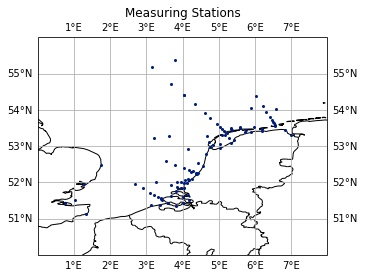

In [8]:
ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines(resolution='10m')
ax.add_feature(cf.BORDERS)

ax.set_extent([0, 8, 50, 56])
ax.gridlines(draw_labels=True)
ax.set_title("Measuring Stations")

ax.plot(stations_x_coords, stations_y_coords, 'o', markersize=2)

if save_plots:
    plt.gcf().savefig(fig_dir + "stations_on_map.pdf", bbox_inches="tight")

# Plotting waterlevel at station Hoek van Holland

reading time dimension: only requested indices
retrieving original timezone succeeded, no conversion to UTC/GMT applied
reading time dimension: reconstruct array
retrieving original timezone succeeded, no conversion to UTC/GMT applied
varname: waterlevel  (2017, 106)  ('time', 'stations'), coordinates=(station_x_coordinate station_y_coordinate station_name)


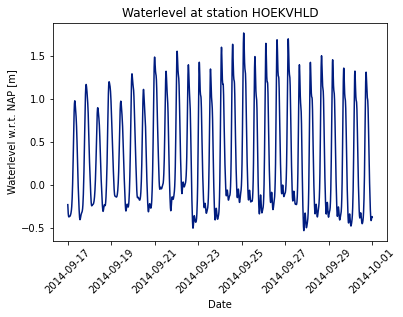

In [9]:
HVH_waterlevel = get_ncmodeldata(file_nc=his_file,
                                 varname="waterlevel",
                                 station="HOEKVHLD",
                                 timestep="all")

fig, ax = plt.subplots()
ax.plot(HVH_waterlevel.var_times, HVH_waterlevel[:])
ax.set_title("Waterlevel at station HOEKVHLD")
ax.tick_params(axis="x", rotation=45)
ax.set_xlabel("Date")
ax.set_ylabel("Waterlevel w.r.t. NAP [m]")

if save_plots:
    plt.gcf().savefig(fig_dir + "waterlevel_hoek_van_holland.pdf", bbox_inches="tight")

# Plotting waterlevel at 17-09

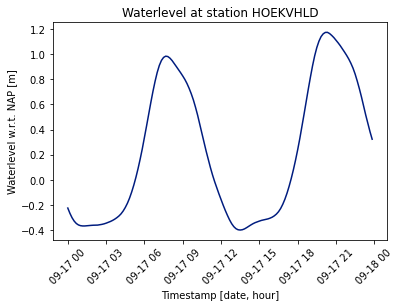

In [26]:
fig, ax = plt.subplots()
ax.plot(HVH_waterlevel.var_times[0:144], HVH_waterlevel[0:144])
ax.tick_params(axis="x", rotation=45)
ax.set_xlabel("Timestamp [date, hour]")
ax.set_ylabel("Waterlevel w.r.t. NAP [m]")
ax.set_title("Waterlevel at station HOEKVHLD")

if save_plots:
    plt.gcf().savefig(fig_dir + "waterlevel_hoek_van_holland_17_09.pdf", bbox_inches="tight")

# Wind

In [11]:
winddata = pd.read_csv("../Data_local/etmgeg_330.csv", skiprows=[1], usecols=[1,2,3], parse_dates=[1])
w = winddata[(winddata['YYYYMMDD']>=20140917) & (winddata['YYYYMMDD']<=20141001)]
w

/home/caspar/anaconda3/envs/py3_parcels_mpi/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,YYYYMMDD,DDVEC,FHVEC
15965,20140917,94,41
15966,20140918,87,31
15967,20140919,53,17
15968,20140920,345,33
15969,20140921,353,120
15970,20140922,333,105
15971,20140923,236,35
15972,20140924,289,66
15973,20140925,264,74
15974,20140926,258,56


Days to compare:

18 & 20 sept - comparable speed, but different direction

20 & 21 sept - comparable direction, but different speed

# Timestamps used in the simulations

Ignore the date, just use the timestamp

In [12]:
ts = HVH_waterlevel.var_times
wl = HVH_waterlevel

**First high tide on september 17th (neap)**

In [13]:
i_wl = wl[(ts.dt.day==17)&(ts.dt.hour<12)].argmax()
d_ts = np.array(ts[(ts.dt.day==17)&(ts.dt.hour<12)])

print(d_ts[i_wl])

2014-09-17T07:40:00.000000000


**First low tide on september 17th**

In [14]:
i_wl = wl[(ts.dt.day==17)&(ts.dt.hour<12)].argmin()
d_ts = np.array(ts[(ts.dt.day==17)&(ts.dt.hour<12)])

print(d_ts[i_wl])

2014-09-17T01:10:00.000000000


**First high tide on september 25th (spring)**

In [15]:
i_wl = wl[(ts.dt.day==25)&(ts.dt.hour<15)].argmax()
d_ts = np.array(ts[(ts.dt.day==25)&(ts.dt.hour<15)])

print(d_ts[i_wl])

2014-09-25T02:10:00.000000000


**First low tide on september 25th**

In [16]:
i_wl = wl[(ts.dt.day==25)&(ts.dt.hour<15)].argmin()
d_ts = np.array(ts[(ts.dt.day==25)&(ts.dt.hour<15)])

print(d_ts[i_wl])

2014-09-25T10:00:00.000000000


In [21]:
i_wl = wl[(ts.dt.day==26)&(ts.dt.hour<12)].argmax()
d_ts = np.array(ts[(ts.dt.day==26)&(ts.dt.hour<12)])

print(d_ts[i_wl])

2014-09-26T02:40:00.000000000


**High tide on september 18th**

2014-09-18T09:00:00.000000000


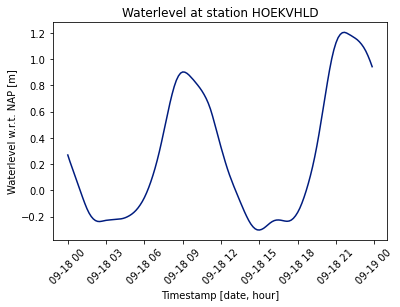

In [18]:
fig, ax = plt.subplots()
wl_18th = HVH_waterlevel[HVH_waterlevel.var_times.dt.day==18]
ts_18th = HVH_waterlevel.var_times[HVH_waterlevel.var_times.dt.day==18]
ax.plot(ts_18th, wl_18th)
ax.tick_params(axis="x", rotation=45)
ax.set_xlabel("Timestamp [date, hour]")
ax.set_ylabel("Waterlevel w.r.t. NAP [m]")
ax.set_title("Waterlevel at station HOEKVHLD")

i_wl = wl[(ts.dt.day==18)&(ts.dt.hour<12)].argmax()
d_ts = np.array(ts[(ts.dt.day==18)&(ts.dt.hour<12)])

print(d_ts[i_wl])

**High tide september 20th**

2014-09-20T11:30:00.000000000


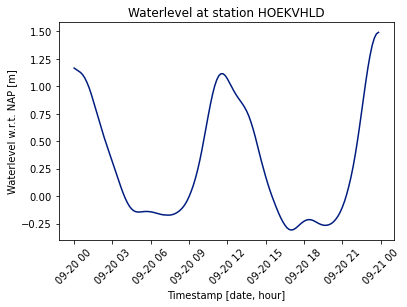

In [19]:
fig, ax = plt.subplots()
wl_20th = HVH_waterlevel[HVH_waterlevel.var_times.dt.day==20]
ts_20th = HVH_waterlevel.var_times[HVH_waterlevel.var_times.dt.day==20]
ax.plot(ts_20th, wl_20th)
ax.tick_params(axis="x", rotation=45)
ax.set_xlabel("Timestamp [date, hour]")
ax.set_ylabel("Waterlevel w.r.t. NAP [m]")
ax.set_title("Waterlevel at station HOEKVHLD")
ts = HVH_waterlevel.var_times
wl = HVH_waterlevel
ht = wl[(ts.dt.day==20) & (ts.dt.hour<15) & (ts.dt.hour>9)].argmax()
ht_ts = np.array(ts[(ts.dt.day==20) & (ts.dt.hour<15) & (ts.dt.hour>9)])
print(ht_ts[ht])

**High tide september 21th**

2014-09-21T00:00:00.000000000


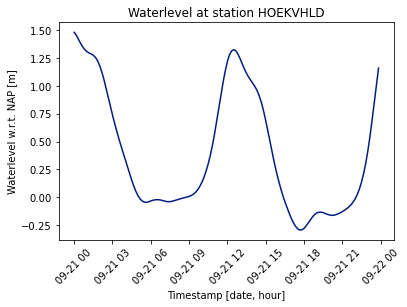

In [20]:
fig, ax = plt.subplots()
wl_20th = HVH_waterlevel[HVH_waterlevel.var_times.dt.day==21]
ts_20th = HVH_waterlevel.var_times[HVH_waterlevel.var_times.dt.day==21]
ax.plot(ts_20th, wl_20th)
ax.tick_params(axis="x", rotation=45)
ax.set_xlabel("Timestamp [date, hour]")
ax.set_ylabel("Waterlevel w.r.t. NAP [m]")
ax.set_title("Waterlevel at station HOEKVHLD")
ts = HVH_waterlevel.var_times
wl = HVH_waterlevel
ht = wl[(ts.dt.day==21) & (ts.dt.hour<15)].argmax()
ht_ts = np.array(ts[(ts.dt.day==21) & (ts.dt.hour<15)])
print(ht_ts[ht])